In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [5]:
import pandas_datareader as data
from pandas_profiling import ProfileReport


<IPython.core.display.Javascript object>

### Prepare data

In [14]:
start = "2010-01-01"
end = "2022-08-19"

df = data.DataReader("AAPL", "yahoo", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425998
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421424


<IPython.core.display.Javascript object>

In [248]:
split = 100

df_test = df.tail(split)
df = df.iloc[:-split, :]

<IPython.core.display.Javascript object>

In [249]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2941.000000,2941.000000,2941.000000,2941.000000,2.941000e+03,2941.000000
mean,39.989416,39.171289,39.580158,39.597142,2.752797e+08,37.665752
std,33.913655,33.118183,33.514831,33.536494,2.269083e+08,33.841678
min,7.000000,6.794643,6.870357,6.858929,4.544800e+07,5.856372
25%,18.347857,17.981428,18.170000,18.174643,1.121264e+08,15.792483
50%,28.107500,27.510000,27.850000,27.900000,1.898032e+08,25.575615
75%,46.987499,46.187500,46.567501,46.610001,3.766812e+08,44.879860
max,157.259995,154.389999,154.970001,156.690002,1.880998e+09,155.816879


<IPython.core.display.Javascript object>

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2941 entries, 2009-12-31 to 2021-09-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2941 non-null   float64
 1   Low        2941 non-null   float64
 2   Open       2941 non-null   float64
 3   Close      2941 non-null   float64
 4   Volume     2941 non-null   float64
 5   Adj Close  2941 non-null   float64
dtypes: float64(6)
memory usage: 160.8 KB


<IPython.core.display.Javascript object>

### EDA

In [251]:
data_profile = ProfileReport(df)
data_profile.to_file("data_eda.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [252]:
data_profile

<IPython.core.display.Javascript object>

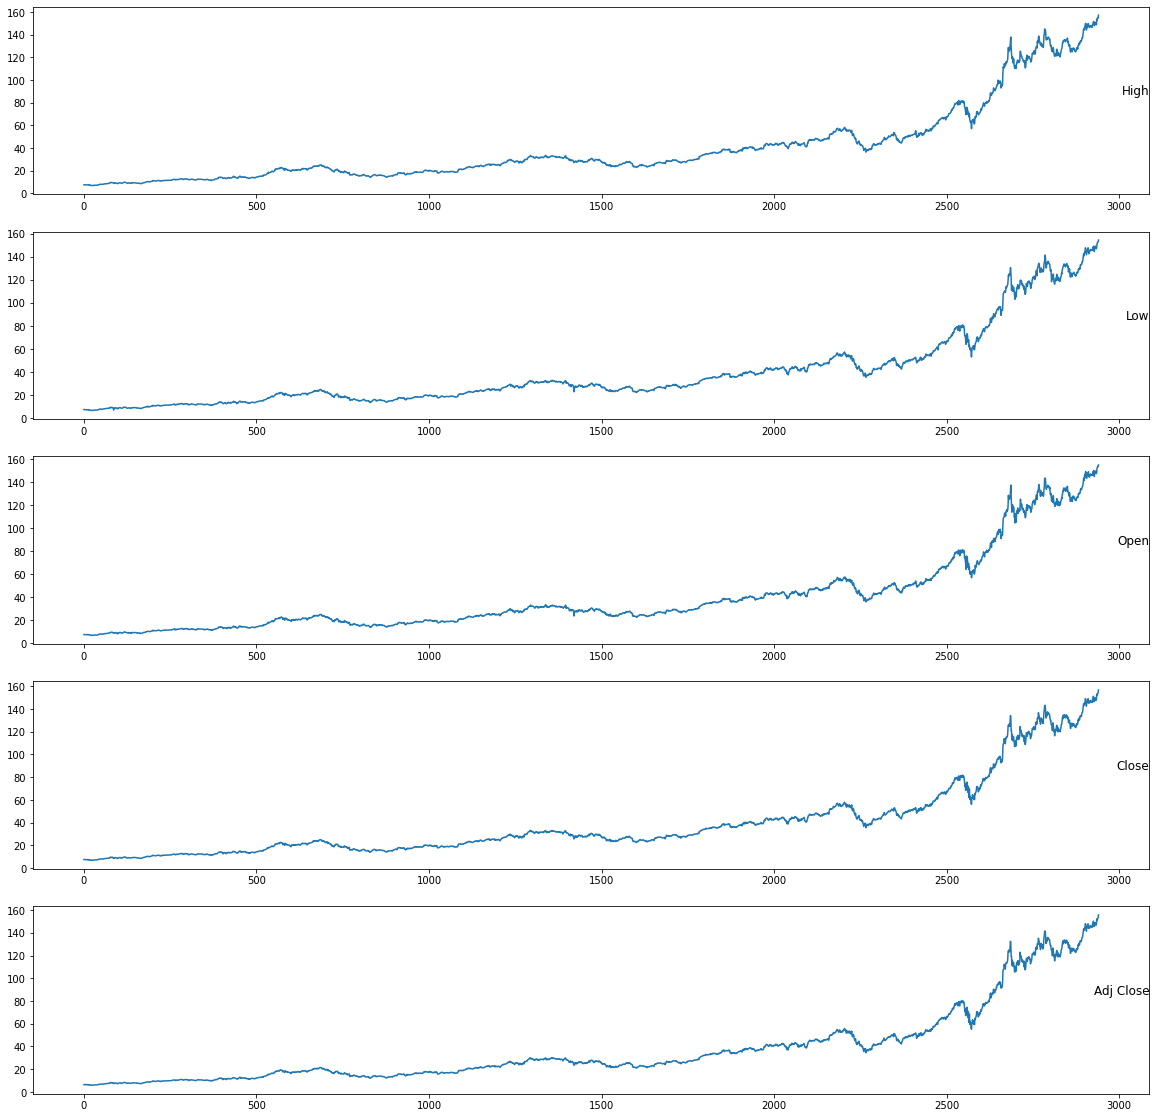

<IPython.core.display.Javascript object>

In [253]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
plt.figure(figsize=(20, 20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc="right")
    i += 1
plt.show()

In [254]:
df_close = df[["Close"]]

<IPython.core.display.Javascript object>

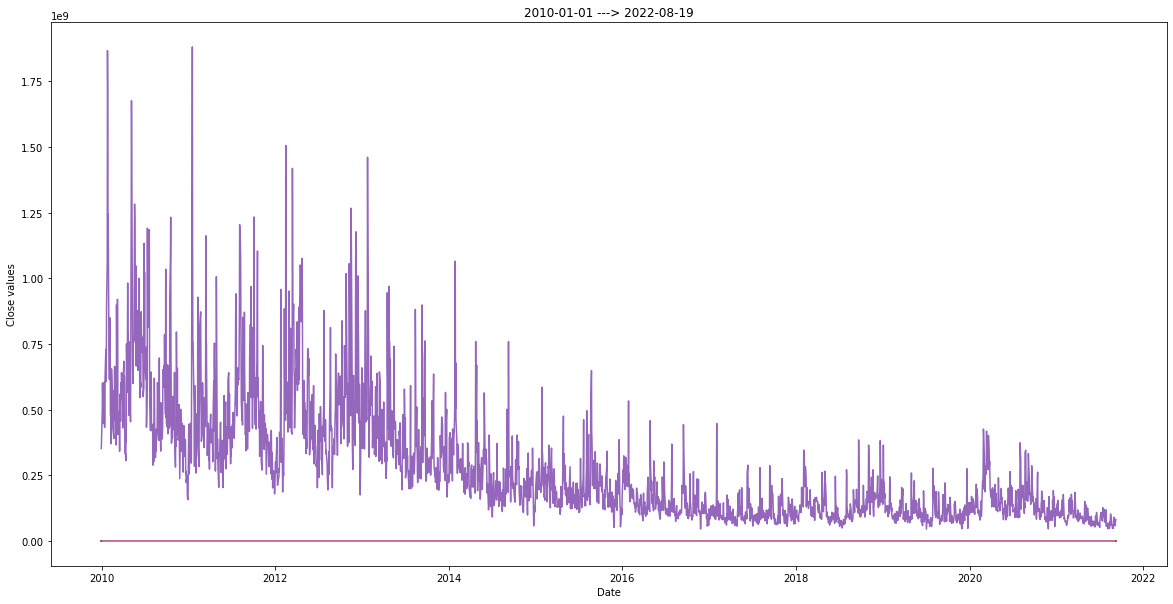

<IPython.core.display.Javascript object>

In [255]:
plt.figure(figsize=(20, 10))
plt.plot(df)
plt.ylabel("Close values")
plt.xlabel("Date")
plt.plot(df_close.rolling(window=8, center=True).mean())
plt.title("2010-01-01 ---> 2022-08-19")
plt.show()  


### Train_test_Split

In [256]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

<IPython.core.display.Javascript object>

In [279]:
X = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = df[['Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)


<IPython.core.display.Javascript object>

In [280]:
ms_X = MinMaxScaler()
X_train = ms_X.fit_transform(X_train)

ms_y = MinMaxScaler()
y_train = ms_y.fit_transform(y_train)

<IPython.core.display.Javascript object>

In [281]:
X_test = ms_X.transform(X_test)
y_test = ms_y.transform(y_test)

<IPython.core.display.Javascript object>

### XGBOOST MODEL

In [282]:
def evaluate(model, X_train, X_test, y_train, y_test):
    # print("Variance score: ", model.score(X, y))
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)

    print(
        "\n***TRAINIG RESULTS***: \n=================================================="
    )
    print("R-squared train dataset:", model.score(X_train, y_train))
    print("MSE train dataset:", mean_squared_error(y_train, yhat_train))
    print("RMSE train dataset:", mean_squared_error(y_train, yhat_train, squared=False))
    print("MAE train dataset:", mean_absolute_error(y_train, yhat_train))

    print("\n***TEST RESULTS***: \n===================================================")
    print("R-squared test dataset:", model.score(X_test, y_test))
    print("MSE test dataset:", mean_squared_error(y_test, yhat_test))
    print("RMSE test dataset:", mean_squared_error(y_test, yhat_test, squared=False))
    print("MAE test dataset:", mean_absolute_error(y_test, yhat_test))

<IPython.core.display.Javascript object>

In [283]:
import xgboost as xgb

model_xgboost = xgb.XGBRegressor().fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [284]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


<IPython.core.display.Javascript object>

In [285]:
evaluate(model_xgboost, X_train, X_test, y_train, y_test)


***TRAINIG RESULTS***: 
R-squared train dataset: 0.9999799902230277
MSE train dataset: 1.0191206396818854e-06
RMSE train dataset: 0.0010095150517361717
MAE train dataset: 0.0007476913015089219

***TEST RESULTS***: 
R-squared test dataset: 0.9998788972256135
MSE test dataset: 6.547025122046536e-06
RMSE test dataset: 0.0025587155219067505
MAE test dataset: 0.0015046966806328904


<IPython.core.display.Javascript object>

In [286]:
import pickle
pickle.dump(model_xgboost, open('xgboost.h5', "wb"))


<IPython.core.display.Javascript object>

In [287]:
# model_xgboost = pickle.load(open('xgboost.h5', "rb"))


<IPython.core.display.Javascript object>

### Predict new value

In [288]:
df_test1 = df_test[["Close"]].rename(columns={"Close": "Actual Close"})

<IPython.core.display.Javascript object>

In [289]:
df_test1["Predict Close"] = ms_y.inverse_transform(
    [
        model_xgboost.predict(
            ms_X.transform(np.reshape(df_test.drop(columns=["Close"]).values, (-1, 5)))
        )
    ]
)[0]

<IPython.core.display.Javascript object>

In [292]:
df_test1.to_csv("test.csv")

<IPython.core.display.Javascript object>

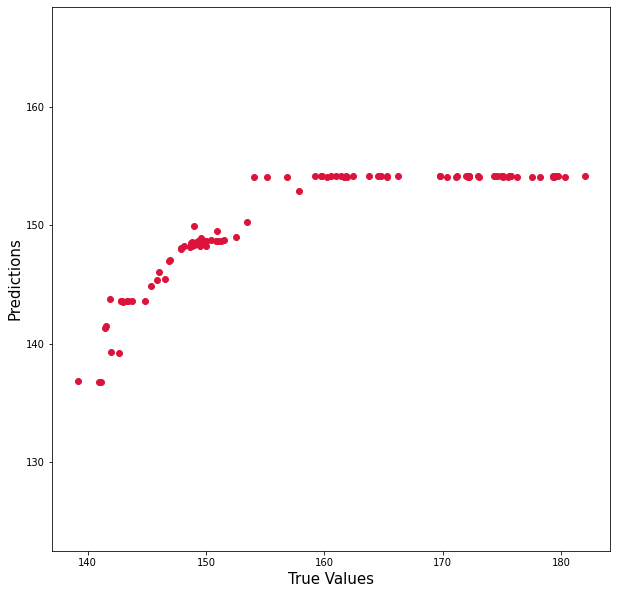

<IPython.core.display.Javascript object>

In [291]:
plt.figure(figsize=(10, 10))
plt.scatter(df_test1["Actual Close"], df_test1["Predict Close"], c="crimson")
# plt.yscale("log")
# plt.xscale("log")

p1 = max(max(df_test1["Predict Close"]), max(df_test1["Actual Close"]))
p2 = min(min(df_test1["Predict Close"]), min(df_test1["Actual Close"]))
# plt.plot([p1, p2], [p1, p2], "b-")
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis("equal")
plt.show()